In [427]:
# Comments and Title

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [429]:
df = pd.read_csv('./loan.csv')

C:\Users\adi00\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [430]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [431]:
# Check if there are all Null columns
all_na = (round(100*(df.isnull().sum()/len(df.index)), 2) > 90)
print('All Null columns = ', all_na[all_na].index.size)

All Null columns =  56


In [432]:
# Lets remove all 54 columns where all records are null
print('Number of columns before cleaning: ', df.columns.size)
df.dropna(how = 'all', axis = 1, inplace = True)
df.dropna(how='all', inplace=True)
print('Number of columns after cleaning: ', df.columns.size)

Number of columns before cleaning:  111
Number of columns after cleaning:  57


In [433]:
# find columns with 0s + nulls
most_empty = round(100*((df.eq(0).sum() + df.isnull().sum())/len(df.index)), 2)
most_empty_columns = most_empty[most_empty > 65].index.tolist()

In [434]:
# list of columns to be dropped
set(df.columns.tolist()) - set(df.drop(columns = most_empty_columns, axis=1).columns.tolist())

{'acc_now_delinq',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'tax_liens',
 'total_rec_late_fee'}

In [435]:
df.drop(columns = most_empty_columns, axis=1, inplace = True)

In [436]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type'],
      dtype='object')

In [437]:
columns_to_drop = ['url', 'desc', 'zip_code', 'initial_list_status', 'total_rec_int', 'policy_code',
                   'application_type', 'pymnt_plan', 'last_pymnt_d', 'last_pymnt_amnt', 'revol_bal', 
                   'last_credit_pull_d']
# url - is the url of the report which has no significance in the analysis
# desc - is text which defines purpose of the loan, we already have a purpose column
# zip_code - is the zip code and has no significance in the analysis
# initial_list_status - all values are 'f'
# total_rec_int - is total received interest. Which shows profit but we are not analyzing profit.
# policy_code - has all values as 1
# application_type - has all values as INDIVIDUAL (which refers to policy_code may be) 
# pymnt_plan - is having all values as 'n'

# mths_since_last_delinq - is having 64% of records null
# last_pymnt_d - is last month when payment was recieved. Does not look significant for our analysis. We can use status column
# last_pymnt_amnt - is last amount which was paid. Does not look dignificant for our analysis
# revol_bal - does not make sense since it is the actual amount. We already have revolving utilization
# last_credit_pull_d - the dates are after loan was issued. So not significant for our analysis

# based on above observations lets drop the columns
df.drop(columns = columns_to_drop, axis=1, inplace = True)

In [438]:
# total_pymnt_inv - is having 97% +ve correlation with 'total_pymnt'
# total_rec_prncp - is having 97% +ve correlation with 'total_pymnt'. Another thought this may be required to update Current loans

df.total_pymnt_inv.corr(df.total_pymnt)
df.total_rec_prncp.corr(df.total_pymnt)

# total_pymnt - is total payment made by the person. Not relevant for our analysis
# based on above analysis lets drop the columns

columns_to_drop = ['total_pymnt_inv', 'total_rec_prncp', 'total_pymnt']

df.drop(columns = columns_to_drop, axis = 1, inplace = True)


In [439]:
# funded_amnt_inv - is having 95% +ve correlation with 'funded_amnt'
df.funded_amnt_inv.corr(df.funded_amnt)

# based on above analysis lets drop the columns

columns_to_drop = [ 'funded_amnt_inv' ]

df.drop(columns = columns_to_drop, axis = 1, inplace = True)

# funded_amnt - is having 98% +ve correlation with loan_amnt. Removing funded_amnt
df.funded_amnt.corr(df.loan_amnt)
df.drop('funded_amnt', axis = 1, inplace = True)

In [440]:
# title is having descriptive inromation of the loan requirement which is already categorized in purpose
df.loc[:, ['title', 'purpose']]
# removing title column
df.drop('title', axis = 1, inplace = True)

In [441]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc'],
      dtype='object')

In [442]:
round(100*((df.eq(0).sum() + df.isnull().sum())/len(df.index)), 2)

id                      0.00
member_id               0.00
loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.46
earliest_cr_line        0.00
inq_last_6mths         48.59
open_acc                0.00
revol_util              0.13
total_acc               0.00
dtype: float64

In [443]:
# emp_length to contain numbers. removing extra characters
# convert to numeric column
df.emp_length = pd.to_numeric(df.emp_length.str.replace(r'[+< years]', ''), errors = 'coerce')

# term should be numeric
df.term = pd.to_numeric(df.term.str.replace(' months', ''))

# issue_d should be converted to date
df.issue_d = pd.to_datetime('1-' + df.issue_d)

# earliest_cr_line should be converted to date
df.earliest_cr_line = pd.to_datetime('1-' + df.earliest_cr_line)

# int_rate and revolv_util should be numeric columns
df.int_rate = pd.to_numeric(df.int_rate.str.replace('%', ''))
df.revol_util = pd.to_numeric(df.revol_util.str.replace('%', ''))

In [444]:
(df.earliest_cr_line.dt.year).value_counts().sort_index()

1970      48
1971      46
1972      53
1973      66
1974      65
1975      83
1976      97
1977     115
1978     165
1979     165
1980     180
1981     187
1982     224
1983     338
1984     409
1985     461
1986     500
1987     618
1988     740
1989     861
1990    1038
1991     980
1992    1063
1993    1514
1994    2027
1995    2150
1996    2274
1997    2456
1998    2851
1999    2968
2000    3250
2001    2521
2002    1927
2003    1856
2004    1761
2005    1493
2006    1169
2007     712
2008     159
2046       1
2050       1
2054       2
2056       1
2059       1
2061       2
2062       5
2063      10
2064       9
2065       9
2066      11
2067      18
2068      20
2069      37
Name: earliest_cr_line, dtype: int64

In [445]:
# some data issues are observed in earliest_cr_line
print('Min Year : ', (df.earliest_cr_line.dt.year).min())
print('Max Year : ', (df.earliest_cr_line.dt.year).max())

Min Year :  1970
Max Year :  2069


In [446]:
# as per information data is between 2007 to 2011. So year after 2011 is not possible
# so years greater than 2011 are probably year in 19th century instead of 20th
# we observed that pandas adds century as 20 incorrectly and in our data its since 2046
print('Number of such incorrect values: ', (df.earliest_cr_line.dt.year > 2045).sum())
# so wherever year > 245, lets replace with year - 100 (i.e. 2069 will become 1969)
df.earliest_cr_line = df.earliest_cr_line.apply(lambda d: d - np.timedelta64(100, 'Y') if (d.year > 2045) else d)

Number of such incorrect values:  127


In [447]:
# lets create column length_of_records which shows since how many years the person had account (or history)
# this will tell us how much reliable the person's history is
df.loc[:, 'length_of_account'] = round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1, 'Y'))

In [448]:
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,length_of_account
0,1077501,1296599,5000,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,83.7,9,27.0
1,1077430,1314167,2500,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,9.4,4,13.0
2,1077175,1313524,2400,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,98.5,10,10.0
3,1076863,1277178,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,21.0,37,16.0
4,1075358,1311748,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,15,53.9,38,16.0


In [449]:
# purpose,
# addr_state
# dti
# earliest_cr_line/length_of_account
# inq_last_6mths
# open_acc
# revol_util
# total_acc

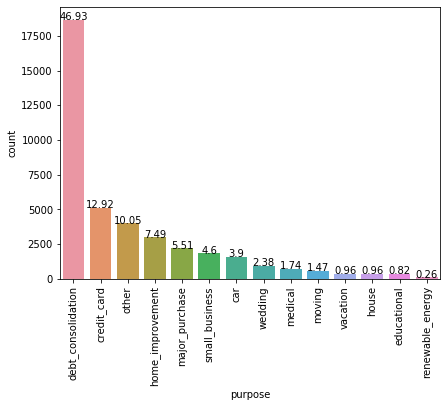

In [546]:
# Purpose Column

purpose_count = df.groupby('purpose').id.count().sort_values(ascending = False)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.xticks(rotation = 90)
plt_purpose = sns.countplot(x="purpose", data=df, order = purpose_count.index)

# For displaying values in bar plot
for i, item in purpose_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_purpose.text(i, item, round(item/len(df)*100, 2), color="black", ha="center")

plt.show()

# Purpose #1 is debt consolidation
# Purpose #2 is credit card
# Purpose #3 is other
# Purpose is unordered categorical column


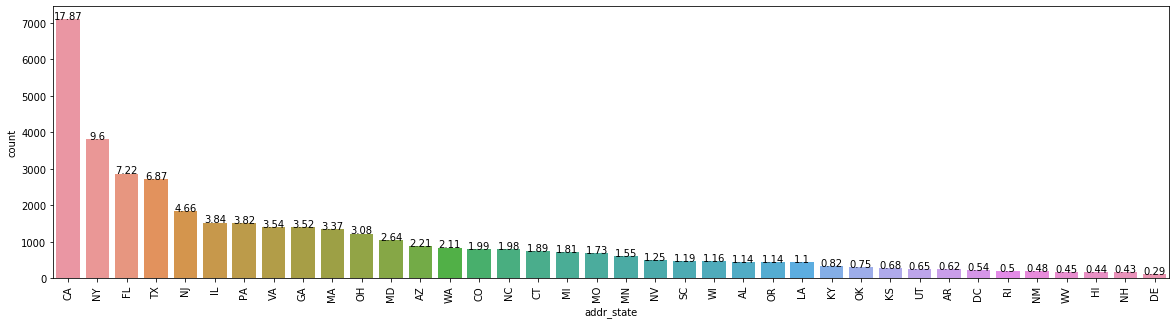

In [451]:
addr_state_count = df.groupby("addr_state").id.count().sort_values(ascending = False)

# check percentiles
addr_state_count.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
# there are some outliers below 10 % percentile with value <= 85. Removing those from plot

addr_state_count = addr_state_count[addr_state_count > 85]

plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
plt_purpose = sns.countplot(x="addr_state", data=df, order = addr_state_count.index)

# For displaying values in bar plot
for i, item in addr_state_count.reset_index(drop = True).sort_values(ascending = False).iteritems():
    plt_purpose.text(i, item, round(item/len(df)*100, 2), color="black", ha="center")

plt.show()
    
# top 6 states are CA, NY, FL, TX, NJ, IL which contributes to 50% of the business
# advertise more in these states

Text(28, 0.045, 'Mean: 13.32')

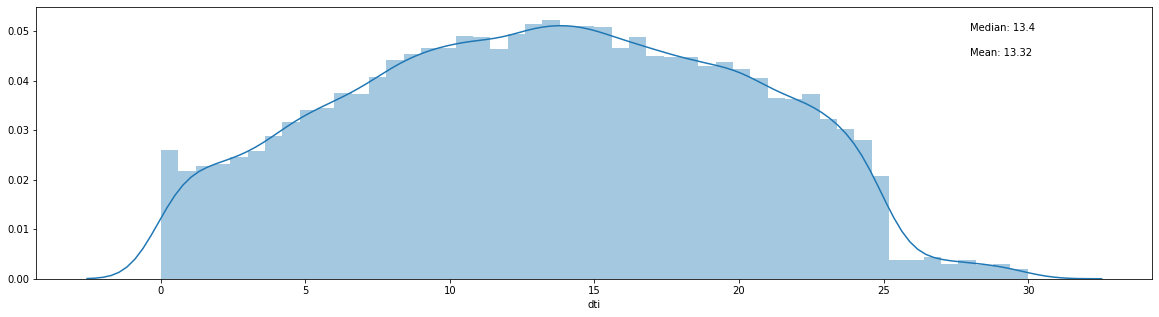

In [452]:
# dti

# dti is a continous variable. Lets plot a distplot
plt.figure(figsize = (20, 5))
dti_plot = sns.distplot(df.dti)
dti_plot.text(28,0.050, 'Median: ' + str(df.dti.median()))
dti_plot.text(28,0.045, 'Mean: ' + str(round(df.dti.mean(), 2)))
plt.show()

# data is evenly distributed
# with mean and median both very close
# mean = 13.32, median = 13.4

# Most of the loans have debt to total income ratio of 13.3
# which means that 13.3 % of individual's monthly salary goes in paying debt
# there is a spike at 0 which indicates first or very minor current loans
# there is a drop at 25 which indicates that lending club rarely offers loan with dti > 25

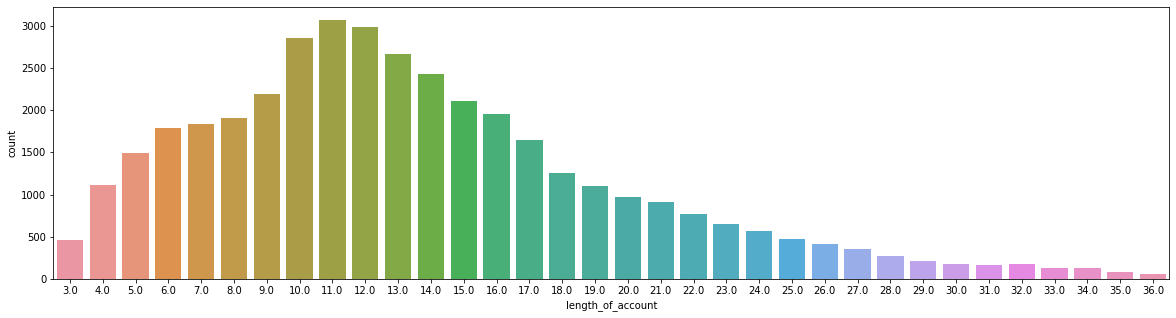

In [476]:
# earliest_cr_line/length_of_account

# this is a continous variable

df.length_of_account.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

# looks like there are some outliers.
# 90% tile is 23, 95%tile is 27 and 99%tile is 36 which is a huge jump

# lets plot a countplot
plt.figure(figsize = (20, 5))
sns.countplot(x = "length_of_account", data = df[df.length_of_account <= 36])
plt.show()

# this looks like a normal dist with some outliers after 36 years
# this is a column that has number of years since first account was created
# hence, it is a good idea to take mode of it
# mode is 11. So maximum number of people had their first credit card 11 years before taking loan

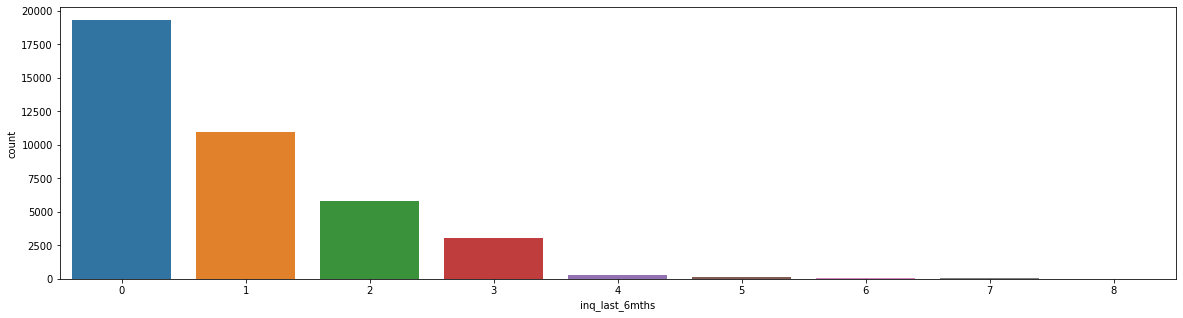

In [481]:
# inq_last_6mths

plt.figure(figsize = (20, 5))
sns.countplot(x = "inq_last_6mths", data = df)
plt.show()

# Most of the people had less than 3 enquiries
# The inquiry is done when user opens a new credit account(credit card or loan) or bank account
# Having this number lower is better. So in our case it looks good
# So, may be we can say that Lending club is more skeptical about people having 4 or more inquiries

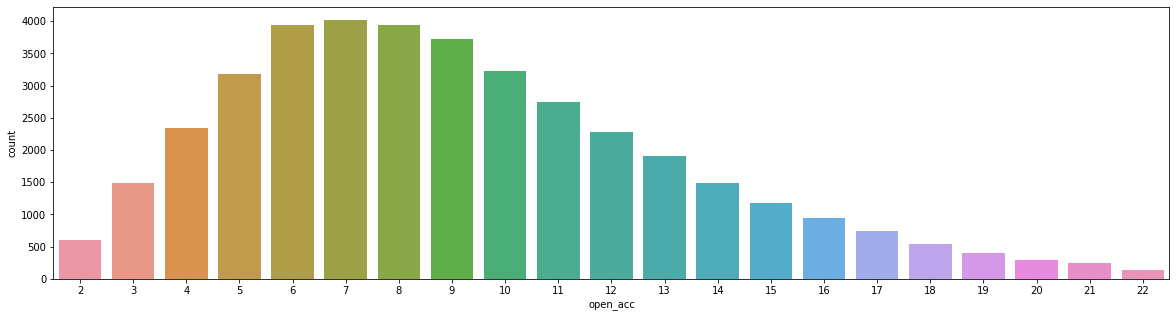

In [488]:
# open_acc

df.open_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
# this column has some outliers
# 99%tile is 22. Filtering data at 99 and plotting

plt.figure(figsize = (20, 5))
sns.countplot(x = "open_acc", data = df[df.open_acc <= 22])
plt.show()

# We see that maximum people who got the loan had count of accounts between 6 and 10
# Number of account is indicator of how many other financial institutions has trusted this person
# having more number of accounts is a sign of a good borrower
# Lending club is a bit linient here though. We see in the chart that there are considerable people with 5 or less accounts


## TODO ##
# Create percentiles variable as it is being used a lot

In [489]:
df.open_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
5%           3.000000
10%          4.000000
25%          6.000000
50%          9.000000
75%         12.000000
90%         15.000000
95%         17.000000
99%         22.000000
max         44.000000
Name: open_acc, dtype: float64

Mode:  16


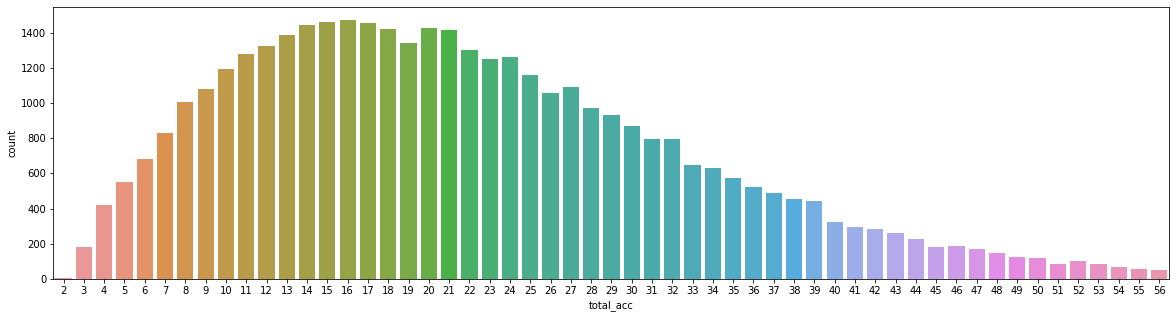

In [527]:
# open_acc	The number of open credit lines in the borrower's credit file.
# total_acc	The total number of credit lines currently in the borrower's credit file

# whats the diff in above 2

df.total_acc.describe(percentiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
# there are some outliers After 56

print('Mode: ', df.total_acc.mode().iloc[0])

plt.figure(figsize = (20, 5))
sns.countplot(x = "total_acc", data = df[df.total_acc <= 56])
plt.show()

# this is normally distributed column
# this is total number of accounts. So Mode would make more sense
# mode is 16

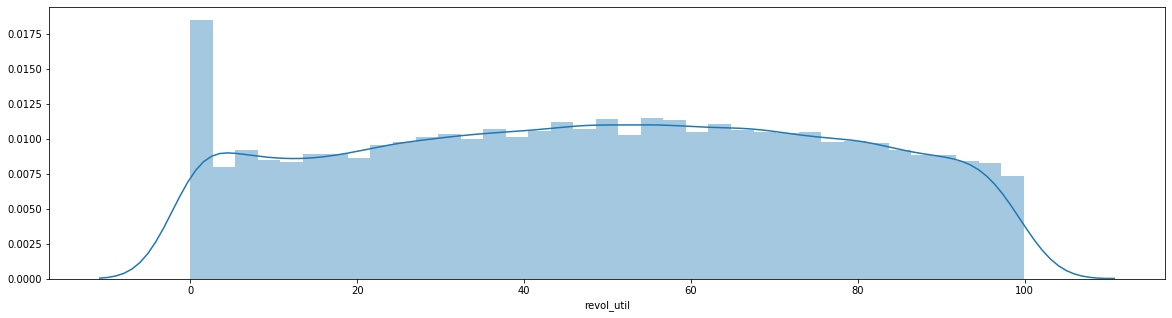

In [541]:
# revol_util

plt.figure(figsize = (20, 5))
sns.distplot(df[~df.revol_util.isnull()].revol_util)
plt.show()

# plot shows that at 0 we have a peak
# this tells us that most of the people who got loan are not utilizing their credit line at all
# this is a sign of good or disciplined person
# there are some people who are utilizing more than 60% of their credit line. these are undisciplined borrowers
# the graph shows us that may be the lending club is not having any check based on this value
#  since the loan the graph is not normal and ther is no cut off 

In [540]:
#######
# Segmented Univariate Analysis
# Bivariate Analysis

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_util,total_acc,length_of_account
0,1077501,1296599,5000,36,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,3,83.7,9,27.0
1,1077430,1314167,2500,60,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,3,9.4,4,13.0
2,1077175,1313524,2400,36,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,2,98.5,10,10.0
3,1076863,1277178,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,10,21.0,37,16.0
4,1075358,1311748,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,15,53.9,38,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,36,8.07,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,1990-11-01,0,13,13.1,40,17.0
39713,90665,90607,8500,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1986-12-01,1,6,26.9,9,21.0
39714,90395,90390,5000,36,8.07,156.84,A,A4,NaN,1.0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,1998-10-01,0,11,19.4,20,9.0
39715,90376,89243,5000,36,7.43,155.38,A,A2,NaN,1.0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,1988-11-01,0,17,0.7,26,19.0


In [ ]:
# LATER


# we are not interested in 'current' loans. Removing rows
df = df[~df.loan_status.isin(['Current'])]
